In [1]:
import pandas as pd
import seaborn as sns

In [2]:
def final_df():
    df = pd.read_csv("../data/final_df/boost.csv")
    df.drop(columns="Unnamed: 0", inplace = True)
    df = df[(df["message"].str.lower() != "\u200eaudio ") & (df["message"].str.lower() != "\u200evideo ")& (df["message"].str.lower() != "\u200eimage ")]
    df.reset_index(drop=True, inplace=True)
    df['date'] = pd.to_datetime(df['date'])
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
    df["emotions_names"] = df["emotions_names"].replace("hapiness","happiness")
    df["emotions_names"] = df["emotions_names"].replace("deception","disappointment")
    df.to_csv("../data/transformed_df/emsemotions.csv")
    return df

In [3]:
df = final_df()
df

,date,time,name,message,emotions,emotions_names
0,2017-04-18,23:45:15,Em,A saludarte,8,happiness
1,2017-04-18,23:47:58,Em,Es que aún tengo que comer,8,happiness
2,2017-04-18,23:48:53,Em,Okaaaay,8,happiness
3,2017-04-18,23:49:14,Em,Teee amo,8,happiness
4,2017-04-18,23:49:49,Em,Nos vemos luego,8,happiness
...,...,...,...,...,...,...
95109,2023-11-27,15:11:36,Em,https://email.ionos.es/appsuite/help/l10n/es_E...,13,neutral
95110,2023-11-27,15:11:59,Em,Aquí lambe,8,happiness
95111,2023-11-27,15:12:01,Em,https://www.ionos.mx/ayuda/e-mail/glosario-exp...,13,neutral
95112,2023-11-27,15:13:08,Em,Aquest crec que es el mes clar:,9,stressed


<Axes: xlabel='emotions', ylabel='count'>

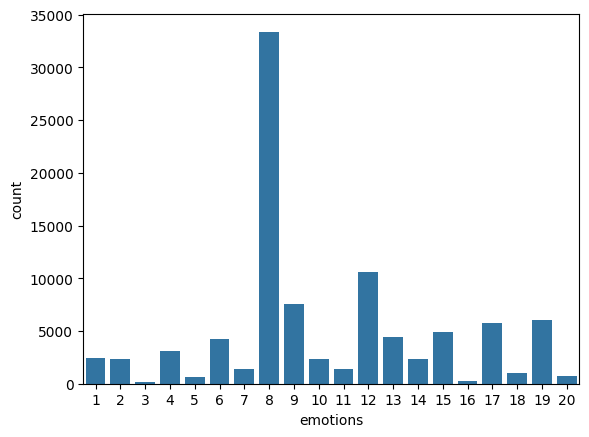

In [4]:
sns.countplot(x=df.emotions)

In [5]:
df.sample()

,date,time,name,message,emotions,emotions_names
87419,2023-03-29,21:05:03,Em,Perfecte amb lo dels textos:),12,assertivity


In [6]:
df.dtypes

date              datetime64[ns]
time                      object
name                      object
message                   object
emotions                   int64
emotions_names            object
dtype: object

In [7]:
emotion_weights = {
    "assertivity": 0.2,
    "happiness": 0.4,
    "neutral": 0.2,
    "defensive": 0.4
}

In [8]:
def ponderations(df):

    '''Function to designate the max emotion grupping be day.
    It also creates the day of the week and if it's a weekend or weekday.'''

    emotion_weights = {
        "assertivity": 0.2,
        "happiness": 0.3,
        "neutral": 0.2,
        "defensive": 0.4
    }

    df['ponderation'] = df['emotions_names'].map(emotion_weights).fillna(1.0)
    grouped_df = df.groupby(['date', 'emotions_names']).agg({'ponderation': 'sum'}).reset_index()

    weighted_percentage_df = grouped_df.pivot(index='date', columns='emotions_names', values='ponderation').fillna(0)
    weighted_percentage_df = weighted_percentage_df.div(weighted_percentage_df.sum(axis=1), axis=0) * 100

    max_emotion_df = weighted_percentage_df.idxmax(axis=1).reset_index(name='max_emotion')

    max_emotion_df['day_of_week'] = max_emotion_df['date'].dt.day_name()

    max_emotion_df['end_day'] = max_emotion_df['day_of_week'].map(lambda x: 'WeekEND' if x in ['Saturday', 'Sunday'] else 'WeekDAY')

    max_emotion_df.reset_index(drop=True, inplace=True)

    max_emotion_df.to_csv("../data/transformed_df/daylyemotions.csv")

    return max_emotion_df

day = ponderations(df)

In [9]:
day.sample(5)

,date,max_emotion,day_of_week,end_day
2210,2023-08-03,insecure,Thursday,WeekDAY
1360,2021-01-24,stressed,Sunday,WeekEND
1199,2020-08-16,happiness,Sunday,WeekEND
1508,2021-06-21,happiness,Monday,WeekDAY
2151,2023-06-05,comprehensive,Monday,WeekDAY


Nice to have si el dia es finde o no

In [10]:
day.max_emotion.value_counts()

max_emotion
happiness         921
stressed          384
doubtful          292
love              273
comprehensive     221
anger              83
expectant          40
joy                34
excitement         32
sadness            15
insecure           10
disappointment      6
assertivity         5
nostalgia           3
surprise            3
neutral             2
picarona            2
Name: count, dtype: int64

In [11]:
def week_emotions(df):

    '''Function to designate the max emotion grupping be day.
    It also creates the day of the week and if it's a weekend or weekday.'''

    emotion_weights = {
        "assertivity": 0.2,
        "happiness": 0.3,
        "neutral": 0.2,
        "defensive": 0.4
    }

    df['ponderation'] = df['emotions_names'].map(emotion_weights).fillna(1.0)
    df['week'] = df['date'].dt.strftime('%Y-%U')
    grouped_df = df.groupby(['week', 'emotions_names']).agg({'ponderation': 'sum'}).reset_index()

    weighted_percentage_df = grouped_df.pivot(index='week', columns='emotions_names', values='ponderation').fillna(0)
    weighted_percentage_df = weighted_percentage_df.div(weighted_percentage_df.sum(axis=1), axis=0) * 100

    max_emotion_df = weighted_percentage_df.idxmax(axis=1).reset_index(name='max_emotion')

    max_emotion_df.reset_index(drop=True, inplace=True)

    max_emotion_df.to_csv("../data/transformed_df/weeklyemotions.csv")

    return max_emotion_df

week = week_emotions(df)

In [12]:
week

,week,max_emotion
0,2017-16,happiness
1,2017-17,love
2,2017-18,happiness
3,2017-19,love
4,2017-20,happiness
...,...,...
338,2023-44,stressed
339,2023-45,stressed
340,2023-46,happiness
341,2023-47,happiness


In [13]:
week.columns

Index(['week', 'max_emotion'], dtype='object')

In [14]:
week.tail(20)

,week,max_emotion
323,2023-29,stressed
324,2023-30,happiness
325,2023-31,happiness
326,2023-32,happiness
327,2023-33,happiness
328,2023-34,happiness
329,2023-35,happiness
330,2023-36,happiness
331,2023-37,happiness
332,2023-38,happiness


In [15]:
week.max_emotion.value_counts()

max_emotion
happiness        259
stressed          44
love              28
doubtful           8
comprehensive      4
Name: count, dtype: int64

In [16]:
def month_emotions(df):

    '''Function to designate the max emotion grupping be day.
    It also creates the day of the week and if it's a weekend or weekday.'''

    emotion_weights = {
        "assertivity": 0.2,
        "happiness": 0.25,
        "neutral": 0.2,
        "defensive": 0.4
    }

    df['ponderation'] = df['emotions_names'].map(emotion_weights).fillna(1.0)
    df['month'] = df['date'].dt.to_period('M')
    grouped_df = df.groupby(['month', 'emotions_names']).agg({'ponderation': 'sum'}).reset_index()

    weighted_percentage_df = grouped_df.pivot(index='month', columns='emotions_names', values='ponderation').fillna(0)
    weighted_percentage_df = weighted_percentage_df.div(weighted_percentage_df.sum(axis=1), axis=0) * 100

    max_emotion_df = weighted_percentage_df.idxmax(axis=1).reset_index(name='max_emotion')

    max_emotion_df.reset_index(drop=True, inplace=True)

    max_emotion_df.to_csv("../data/transformed_df/monthlyemotions.csv")

    return max_emotion_df

month = month_emotions(df)

In [17]:
month

,month,max_emotion
0,2017-04,happiness
1,2017-05,love
2,2017-06,happiness
3,2017-07,love
4,2017-08,love
...,...,...
75,2023-07,stressed
76,2023-08,happiness
77,2023-09,happiness
78,2023-10,happiness


In [18]:
month.max_emotion.value_counts()

max_emotion
happiness    54
stressed     18
love          7
doubtful      1
Name: count, dtype: int64

In [19]:
'''pedf = predict_emotion_df(df)
pedf'''

'pedf = predict_emotion_df(df)\npedf'

In [48]:
def predict_emotion_df(df):

    '''Function to get the dataframe we're going to use to predict the emotion of the month we're
    entering based on the last week of the month messages.'''


    df2 = df.copy()

    df2['year'] = df2['date'].dt.year
    df2['month'] = df2['date'].dt.month

    # messages
    last_day_of_month = df2.groupby(['year', 'month'])['date'].max().reset_index()
    last_day_of_month['last_7_days'] = last_day_of_month['date'] - pd.DateOffset(days=6)
    last_day_of_month['last_7_days'] = last_day_of_month['last_7_days'].dt.date
    result_df = pd.merge(df2, last_day_of_month, on=['year', 'month'], how='inner', suffixes=('', '_max'))
    result_df = result_df[result_df['date'] >= result_df['last_7_days']]
    result_df.drop(['year', 'month', 'date_max', 'last_7_days','name', 'ponderation', 'message'], axis=1, inplace = True)
    result_df['week'] = result_df['date'].dt.to_period('M')
    result_df.rename(columns={'week': 'month'}, inplace=True)

    # days
    df3 = day.copy()
    df3.rename(columns={'max_emotion': 'max_emotion_day'}, inplace=True)
    df3.drop(['day_of_week', 'end_day'], axis=1, inplace=True)
    merged_df = pd.merge(result_df,df3, on='date', how='right')

    # weeks
    df4 = week.copy()
    print(df4.dtypes)
    df4['week'] = pd.to_datetime(df4['week'] + '-1', format='%Y-%U-%w')
    df4['week'] = df4['week'].dt.to_period('M')
    df4.rename(columns={'max_emotion': 'max_emotion_week'}, inplace=True)
    df4.rename(columns={'week': 'month'}, inplace=True)
    merged_df2 = pd.merge(merged_df, df4, on='month', how='right')

    # month
    df5 = month.copy()
    df5.rename(columns={'max_emotion': 'next_month_emotion'}, inplace=True)   
    merged_df2['month'] = merged_df2['month']+ 1 #+ pd.DateOffset(months=1)+ pd.DateOffset(days=1)
    merged_df3 = pd.merge(merged_df2, df5, on='month', how='right', suffixes=('_merged_df2', '_df5'))

    merged_df3['month'] = merged_df2['month']- 1
    merged_df3.drop(['month','emotions_names'], axis=1, inplace = True)
    merged_df3.dropna(subset=['next_month_emotion'], inplace = True)
    merged_df3.dropna(subset=['next_month_emotion'], inplace = True)


    merged_df3 = merged_df3.drop(0)
    merged_df3 = merged_df3.reset_index(drop=True)


    # changing the words for numbers

    emotions = {"sadness":1,"joy":2,"fear":3,"anger":4,"surprise":5,"defensive":6, "nostalgia":7,"happiness":8,"stressed":9,
                "expectant":10,"insecure":11,"assertivity":12,"neutral":13,"excitement":14,"comprehensive":15,
                "helpless":16,"love":17,"disappointed":18,"doubtful":19,"picarona":20}

    columns_to_replace = ["max_emotion_day", "max_emotion_week", "next_month_emotion"]

    for column in columns_to_replace:
        merged_df3[column] = merged_df3[column].replace(emotions)



    merged_df3.to_csv("../data/transformed_df/pdef.csv")

    
    # Display the result
    return merged_df3



In [49]:
pedf = predict_emotion_df(df)
pedf

week           object
max_emotion    object
dtype: object


,date,time,emotions,max_emotion_day,max_emotion_week,next_month_emotion
0,2017-04-24,00:35:19,9.0,17,8.0,17
1,2017-04-24,00:35:33,19.0,17,8.0,17
2,2017-04-24,00:35:42,8.0,17,8.0,17
3,2017-04-24,10:53:34,9.0,17,8.0,17
4,2017-04-24,10:53:37,8.0,17,8.0,17
...,...,...,...,...,...,...
96161,2023-10-31,10:32:52,19.0,19,9.0,9
96162,2023-10-31,10:34:27,19.0,19,9.0,9
96163,2023-10-31,19:42:34,6.0,19,9.0,9
96164,2023-10-31,19:42:40,4.0,19,9.0,9
